Fold 1/5
Epoch 1/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 2/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 3/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 4/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 5/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 6/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 7/40, Loss: 2347098.8766233767, Accuracy: 0.006493506493506494, Val Loss: 2366019.090909091, Val Accuracy: 0.006493506493506494
Epoch 8/40, Loss: 2347098.8766233767, Accuracy: 0.006

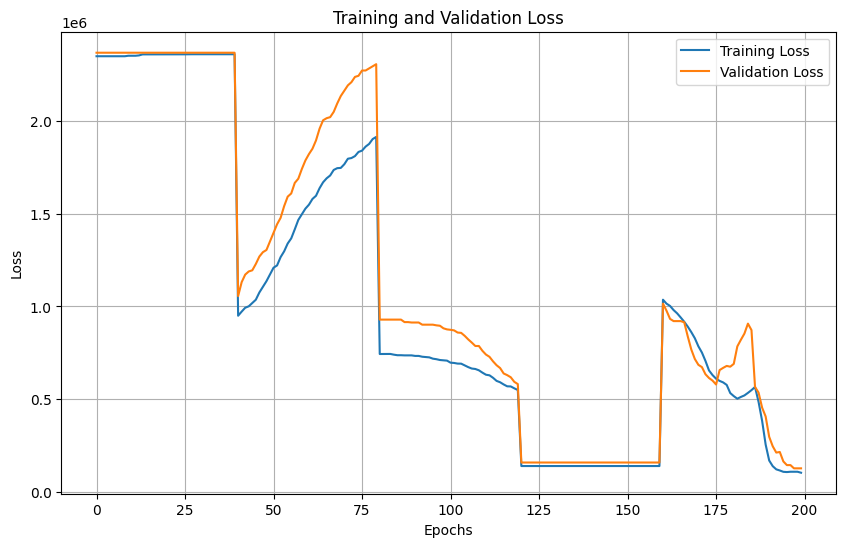

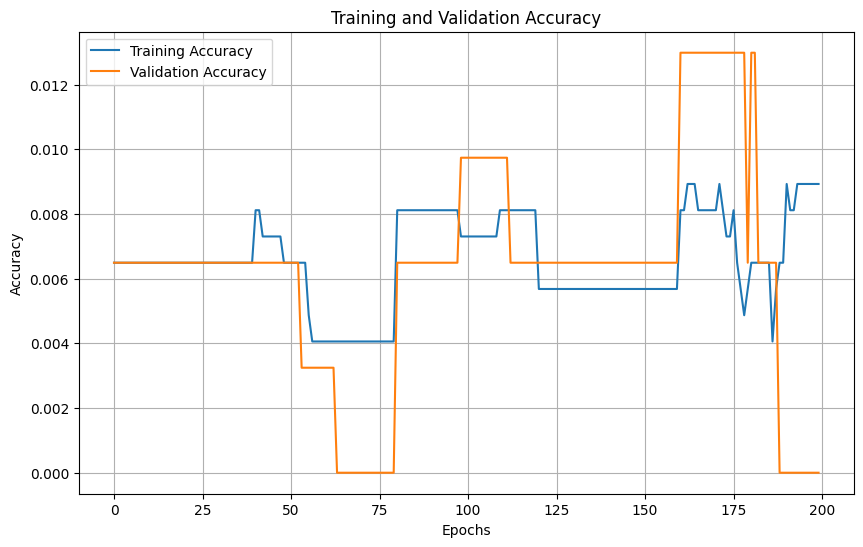

In [1]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../utils")))
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../class")))

from data import preprocess_data

from Train import Train

# 실험 설정
csv_path = "../../../Data/font_data 2.csv"

train_instance = Train(
    epoch=40,
    batch=32,
    activation="relu",
    output_activation="softmax",
    weight_init="He",
    learning_rate=0.001,
    optimizer="adam",
    dropout=0.1,
    loss_function="mse"
)

# 데이터 로드
inputs, targets_one_hot, targets = train_instance.load_data(csv_path)

# K-Fold Cross Validation 준비
folds = train_instance.k_fold_split(inputs, targets_one_hot)
# 학습 실행
for i, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Fold {i + 1}/{len(folds)}")
    train_instance.train(X_train, y_train, X_val, y_val)

# 결과 저장 및 시각화
train_instance.save_results()
train_instance.plot_history()